In [8]:
import pandas as pd
from collections import defaultdict

loaded = defaultdict(list)
squished = []

file_base_labels = {
    "glad-mixed-sweep": "mixed grid",
    "glad-standard-sweep": "standard grid"
}

file_labels = dict()

for key in file_base_labels:
    for i in range(1, 10):
        file_labels[key + "-" + str(i)] = file_base_labels[key] + " " + str(i) + "0 %"
        
print(file_labels)

folder = "./gladiator_scrooge-vs-defector-sweep-runs/"

num_files = 20


for i in range(num_files):
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)
    
super_squished = pd.concat(squished)
#super_squished = pd.concat([squished_coop, squished_balanced])
super_squished.head()

{'glad-standard-sweep-3': 'standard grid 30 %', 'glad-mixed-sweep-2': 'mixed grid 20 %', 'glad-standard-sweep-8': 'standard grid 80 %', 'glad-mixed-sweep-4': 'mixed grid 40 %', 'glad-standard-sweep-9': 'standard grid 90 %', 'glad-mixed-sweep-5': 'mixed grid 50 %', 'glad-standard-sweep-4': 'standard grid 40 %', 'glad-standard-sweep-7': 'standard grid 70 %', 'glad-mixed-sweep-9': 'mixed grid 90 %', 'glad-mixed-sweep-8': 'mixed grid 80 %', 'glad-standard-sweep-2': 'standard grid 20 %', 'glad-standard-sweep-1': 'standard grid 10 %', 'glad-standard-sweep-6': 'standard grid 60 %', 'glad-mixed-sweep-1': 'mixed grid 10 %', 'glad-mixed-sweep-3': 'mixed grid 30 %', 'glad-standard-sweep-5': 'standard grid 50 %', 'glad-mixed-sweep-6': 'mixed grid 60 %', 'glad-mixed-sweep-7': 'mixed grid 70 %'}


,update,avg_age,max_age,avg_coop,avg_points,percent_defector,scrooge,replicant,config
0,0,0.0000,0,0.010500,0.0000,0.300000,0.700000,0,standard grid 30 %
1,10,10.0000,10,0.010500,10.0000,0.300000,0.700000,0,standard grid 30 %
2,20,20.0000,20,0.010500,20.0000,0.300000,0.700000,0,standard grid 30 %
3,30,30.0000,30,0.010500,31.1889,0.300000,0.700000,0,standard grid 30 %
4,40,25.6683,40,0.010521,25.4747,0.298611,0.701389,0,standard grid 30 %


Populating the interactive namespace from numpy and matplotlib


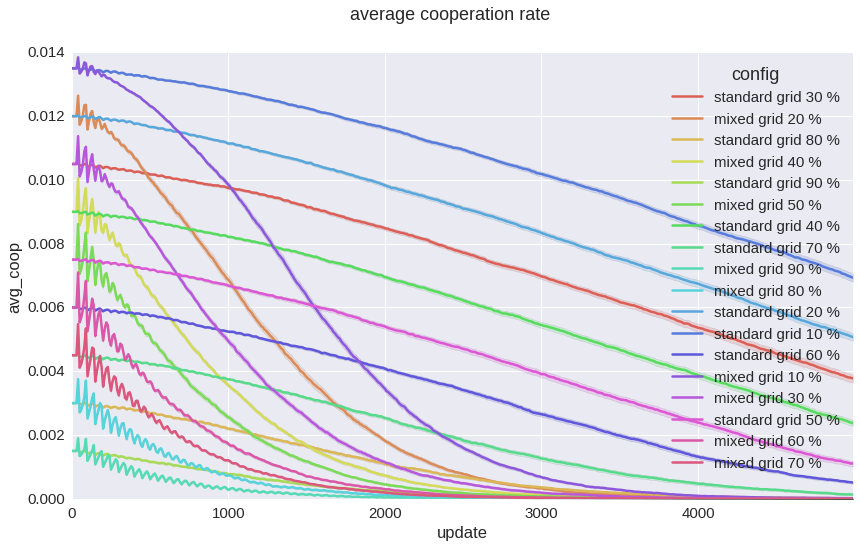

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)
sns.plt.suptitle("average cooperation rate")
sns.tsplot( time="update", value="avg_coop", unit="replicant", 
           condition="config", data=super_squished, color="hls")


Populating the interactive namespace from numpy and matplotlib


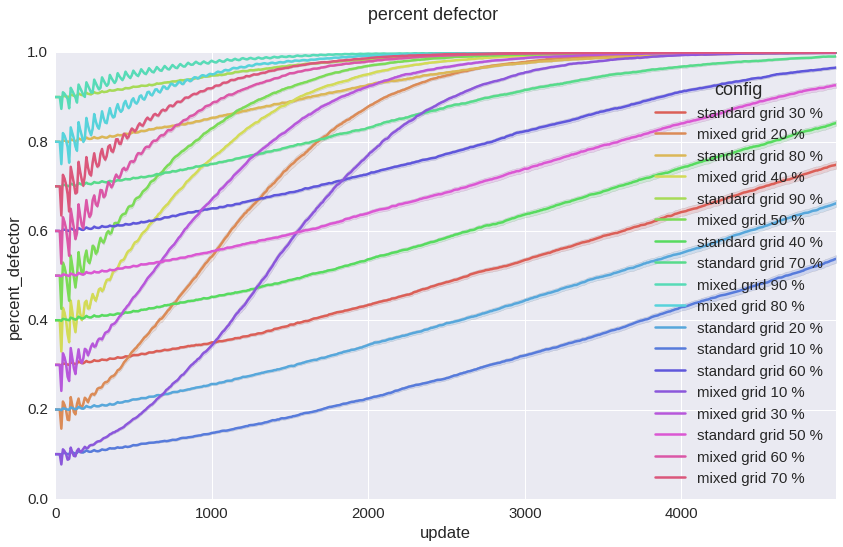

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)
sns.plt.suptitle("percent defector")
sns.tsplot( time="update", value="percent_defector", unit="replicant", 
           condition="config", data=super_squished, color="hls")